In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
import imp
import numpy as np
from scipy import constants

import lsst.daf.persistence as daf_persistence
from lsst.sims.photUtils import Bandpass, PhotometricParameters
from lsst.utils import getPackageDir

In [3]:
def look(img, range=None, x_range=None, y_range=None):
    """Simple function to wrap matplotlib and display an image with a colorbar."""
    plt.figure(figsize=(8, 6))
    if range is None:
        range = [np.min(img), np.max(img)]
    img_use = np.clip(img, range[0], range[1])
    if x_range is not None:
        x0 = int(x_range[0])
        x1 = int(x_range[1])
        if x0 < 0:
            img_use = np.roll(img_use, -x0, axis=1)
            x1 -= x0
            x0 = 0
        img_use = img_use[:, x0: x1]
    if y_range is not None:
        y0 = int(y_range[0])
        y1 = int(y_range[1])
        if y0 < 0:
            img_use = np.roll(img_use, -y0, axis=0)
            y1 -= y0
            y0 = 0
        img_use = img_use[y0: y1, :]
    fig_show = plt.imshow(img_use, interpolation='none', origin='lower', cmap=cm.rainbow)
    plt.colorbar(fig_show, orientation='vertical', shrink=1)
#    cbar.set_label('DCR (arcsec)', labelpad=0)
    plt.show()

In [4]:
repository = "/Users/sullivan/LSST/simulations/test6/output_data"
obsid_range = [202, 222, 2]
band_name = "g"

In [5]:
imp.load_source('dcr_1d_correction', '/Users/sullivan/LSST/LSST-DCR/experimental_DCR/python/dcr_1d_correction.py')
from dcr_1d_correction import DcrCorrection

In [6]:
self = DcrCorrection(n_step=5, repository=repository, obsid_range=obsid_range, band_name=band_name)

/Users/sullivan/LSST/LSST-DCR/experimental_DCR/python/dcr_1d_correction.py:153: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  dcr_matrix[_i + i_low, f_i + _i * self.n_step] = frac_low
/Users/sullivan/LSST/LSST-DCR/experimental_DCR/python/dcr_1d_correction.py:154: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  dcr_matrix[_i + i_high, f_i + _i * self.n_step] = frac_high


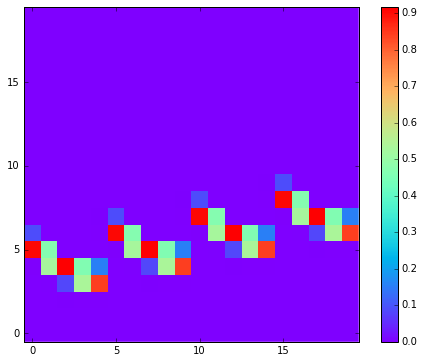

In [7]:
look(self.dcr_matrix[4],x_range=[20,40],y_range=[0,20])

In [8]:
self.build_transfer_matrix()

In [9]:
self.build_model()

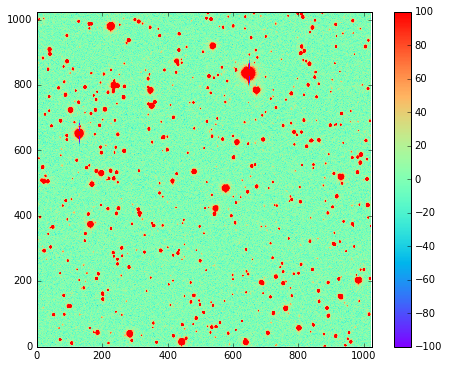

In [10]:
template_exposure = self.create_template_from_model(elevation=40.,azimuth=0)
look(template_exposure.getMaskedImage().getImage().getArray(), range=[-1e2,1e2])

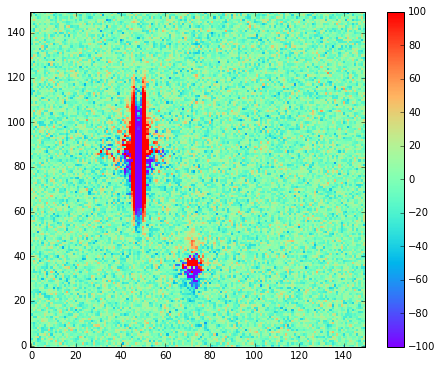

In [12]:
img1 = self.exposures[2].getMaskedImage().getImage().getArray()
img2 = (self.create_template_from_model(elevation=self.elevation_arr[2],azimuth=0)).getMaskedImage().getImage().getArray()
look(img1 - img2, range=[-1e2,1e2],x_range=[600,750],y_range=[750,900])

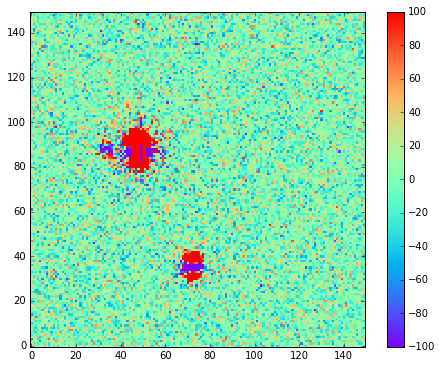

In [18]:
img1 = self.exposures[2].getMaskedImage().getImage().getArray()
img2 = self.exposures[3].getMaskedImage().getImage().getArray()
look(img1 - img2, range=[-1e2,1e2],x_range=[600,750],y_range=[750,900])

In [233]:
template_sum = np.zeros(self.template[0].shape)
for temp in self.template:
    template_sum += temp

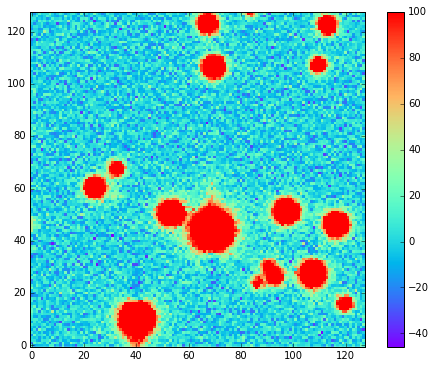

In [234]:
look(template_sum, range = [-1e2, 1e2])

In [20]:
calexp = self.butler.get("calexp", dataId={'visit': 202, 'raft': '2,2', 'sensor': '1,1', 'filter': 'g'})

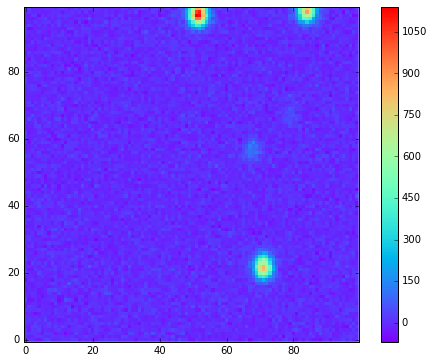

In [21]:
look((calexp.getMaskedImage().getImage().getArray())[0:100,0:100])

In [23]:
calexp.getWcs()

<lsst.afw.image.imageLib.Wcs; proxy of <Swig Object of type 'std::shared_ptr< lsst::afw::image::Wcs > *' at 0x119b06570> >